<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/231009_%EA%B3%BC%EC%A0%9C_%EB%A7%9D%ED%95%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
## get_clf_eval() 함수 만들기

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
#############로지스틱 회귀를 이용한 예측 모델 생성############################################################################

#피쳐 데이터 세트 X, 레이블 데이터 세트 y를 추출
#맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치를 -1을 이용해 추출
X=diabetes_data.iloc[:, :-1]
y=diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926,          F1: 0.6465, AUC:0.8083


In [ ]:
## precision_recall_curve_plot()

def precision_recall_curve_plot(y_test, pred_proba_c1):
  #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  #threshold값 X축의 scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

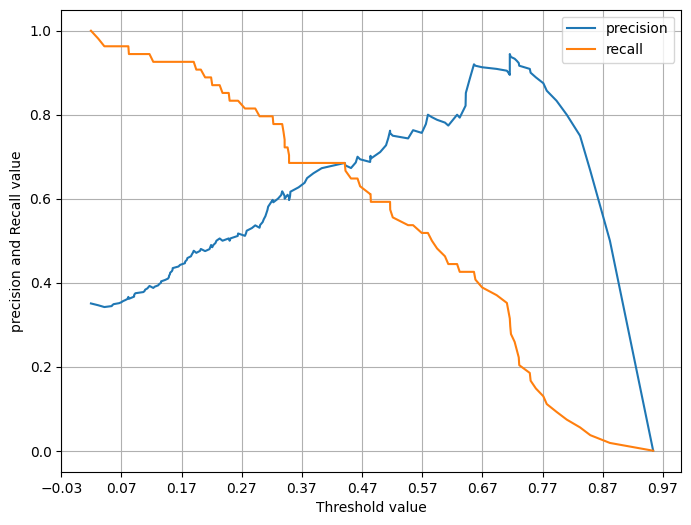

In [ ]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


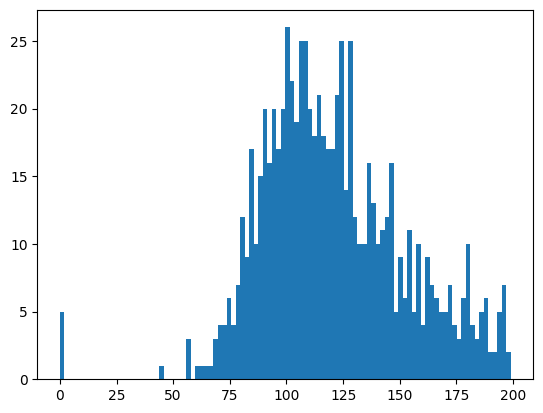

In [ ]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [ ]:
# 0값을 검사할 피쳐명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count=diabetes_data['Glucose'].count()

# 피쳐별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [ ]:
X=diabetes_data.iloc[:, :-1]
y=diabetes_data.iloc[:, -1]


#StandardScaler 클래스를 이용하여 피쳐 데이터 세트에 일괄 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [22 32]]
정확도: 0.7792, 정밀도: 0.7273, 재현율: 0.5926,          F1: 0.6531, AUC:0.8437


In [ ]:
#get_eval_by_threshold()
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  #threshold list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

  get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

In [ ]:
thresholds=[0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3


TypeError: ignored

In [ ]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

#위에서 구한 lr_clf 의 predict_prba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환.
pred_th_045 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_045, pred_proba[:, 1])

오차 행렬
[[85 15]
 [21 33]]
정확도: 0.7662, 정밀도: 0.6875, 재현율: 0.6111,          F1: 0.6471, AUC:0.8437


In [ ]:
###분류
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

#붓꽃 데이터를 로딩, 학습 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

#export_graohviz() 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,  feature_names=iris_data.feature_names, impurity=True, filled = True)


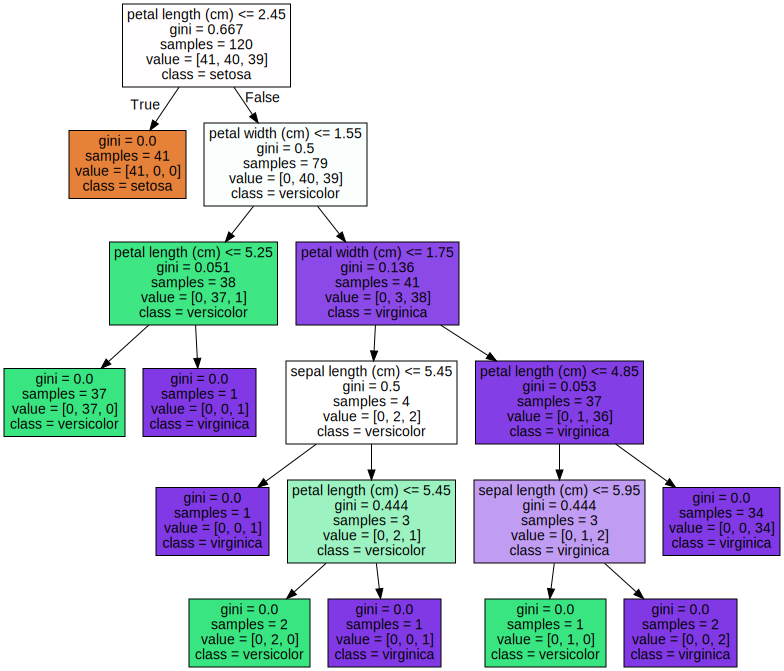

In [ ]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)
### samples = 120; 전체 데이터 120개
### value = [41, 40, 39] 각각 레이블별로 41, 40, 39개로 구성.
### 하위노드를 가질 경우 class=setosa의 개수가 41개로 가장 많다

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

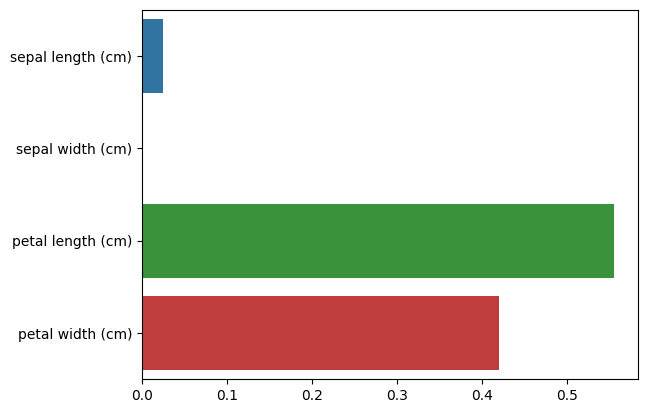

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

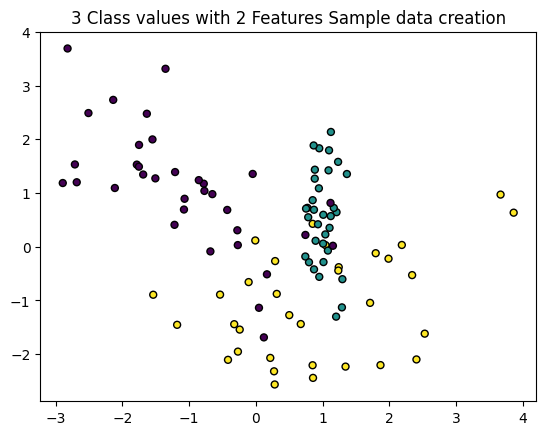

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: ignored

In [ ]:
# min_saples_leaf = 6 으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: ignored

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 df로 로드
feature_name_df = pd.read_csv('/content/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

#피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [9]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [10]:
## 중복된 피처명에 대해 원본 피처명_1 등으로 새롭게 피처명 반환

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                             if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [22]:

import pandas as pd

def get_human_dataset():
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('/content/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])

  # 중복된 피처를 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩. 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [24]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 5.5 MB
None


In [25]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n',dt_clf.get_params())

ValueError: ignored

챗 지피티 돌려도 왜 틀렸는지 모르겠어서 포기합니다....